In [1]:
import nfl_regression

## Importing the dataset

In [2]:
train_receiver_stats, train_player_stats, train_weeks = nfl_regression.preprocess_year_data('2021')
X_train, Y_train = nfl_regression.get_yards_by_stats(train_receiver_stats, train_player_stats, train_weeks, '2021')

test_receiver_stats, test_player_stats, test_weeks = nfl_regression.preprocess_year_data('2023')
X_test, Y_test = nfl_regression.get_yards_by_stats(test_receiver_stats, test_player_stats, test_weeks, '2023')

## Linear regression

In [3]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)
print(f'train {reg.score(X_train, Y_train):.4f}', f'test {reg.score(X_test, Y_test):.4f}')

train 0.6291 test 0.4175


In [4]:
lin_k_best = nfl_regression.find_top_select_k_best(reg, (X_train, Y_train), (X_test, Y_test))
print(f'k {lin_k_best[0]}', f'train {lin_k_best[1]:.4f}', f'test {lin_k_best[2]:.4f}')

k 14 train 0.5203 test 0.4478


In [5]:
lin_rfe = nfl_regression.find_top_rfe(reg, (X_train, Y_train), (X_test, Y_test))
print(f'k {lin_rfe[0]}', f'train {lin_rfe[1]:.4f}', f'test {lin_rfe[2]:.4f}')

k 6 train 0.5369 test 0.4470


## ElasticNet

In [6]:
from sklearn.linear_model import ElasticNet
reg = ElasticNet().fit(X_train, Y_train)
print(f'train {reg.score(X_train, Y_train):.4f}', f'test {reg.score(X_test, Y_test):.4f}')

train 0.6210 test 0.4521


In [7]:
elastic_k_best = nfl_regression.find_top_select_k_best(reg, (X_train, Y_train), (X_test, Y_test))
print(f'k {elastic_k_best[0]}', f'train {elastic_k_best[1]:.4f}', f'test {elastic_k_best[2]:.4f}')

k 14 train 0.5171 test 0.4576


In [8]:
elastic_rfe = nfl_regression.find_top_rfe(reg, (X_train, Y_train), (X_test, Y_test))
print(f'k {elastic_rfe[0]}', f'train {elastic_rfe[1]:.4f}', f'test {elastic_rfe[2]:.4f}')

k 22 train 0.5960 test 0.4698


## SVR

In [9]:
from sklearn.svm import SVR
reg = SVR(kernel='poly').fit(X_train, Y_train)
print(f'train {reg.score(X_train, Y_train):.4f}', f'test {reg.score(X_test, Y_test):.4f}')

train 0.4577 test 0.3904


In [10]:
SVR_k_best = nfl_regression.find_top_select_k_best(reg, (X_train, Y_train), (X_test, Y_test))
print(f'k {SVR_k_best[0]}', f'train {SVR_k_best[1]:.4f}', f'test {SVR_k_best[2]:.4f}')

k 15 train 0.5865 test 0.5056


## Decision Tree Regressor

In [11]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=0).fit(X_train, Y_train)
print(f'train {reg.score(X_train, Y_train):.4f}', f'test {reg.score(X_test, Y_test):.4f}')

train 1.0000 test 0.1206


In [12]:
DTR_k_best = nfl_regression.find_top_select_k_best(reg, (X_train, Y_train), (X_test, Y_test))
print(f'k {DTR_k_best[0]}', f'train {DTR_k_best[1]:.4f}', f'test {DTR_k_best[2]:.4f}')

k 1 train 0.5901 test 0.3589


In [13]:
DTR_rfe = nfl_regression.find_top_rfe(reg, (X_train, Y_train), (X_test, Y_test))
print(f'k {DTR_rfe[0]}', f'train {DTR_rfe[1]:.4f}', f'test {DTR_rfe[2]:.4f}')

k 1 train 0.6190 test 0.3336


## Random Forest Regressor

In [14]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(random_state=0).fit(X_train, Y_train)
print(f'train {reg.score(X_train, Y_train):.4f}', f'test {reg.score(X_test, Y_test):.4f}')

train 0.9447 test 0.5020


## MLP Regressor

In [15]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(batch_size=20, solver='adam', learning_rate_init=0.0001, max_iter=1000, random_state=9).fit(X_train, Y_train)
print(f'train {reg.score(X_train, Y_train):.4f}', f'test {reg.score(X_test, Y_test):.4f}')

train 0.6162 test 0.4963


## SVR example with 15 features

In [16]:
from sklearn.feature_selection import SelectKBest, f_regression
reg = SVR(kernel='poly')
k_best = SelectKBest(f_regression, k=15).fit(X_train, Y_train)
Xk_train, Xk_test = k_best.transform(X_train), k_best.transform(X_test)
reg = reg.fit(Xk_train, Y_train)
print(f'train {reg.score(Xk_train, Y_train):.4f}', f'test {reg.score(Xk_test, Y_test):.4f}')

train 0.5865 test 0.5056


In [17]:
import pandas as pd
Yk_test = pd.Series(reg.predict(Xk_test))
Yk_test.describe()

count    336.000000
mean      18.629041
std       14.397505
min       -3.243038
25%        8.386757
50%       14.637396
75%       25.520793
max       77.364786
dtype: float64

In [18]:
Y_test.describe()

count    336.000000
mean      18.165551
std       19.638690
min       -0.125000
25%        3.750000
50%       11.937500
75%       24.468750
max       99.125000
Name: weekly_yards, dtype: float64

## Analysing the distribution of outputs

<Axes: >

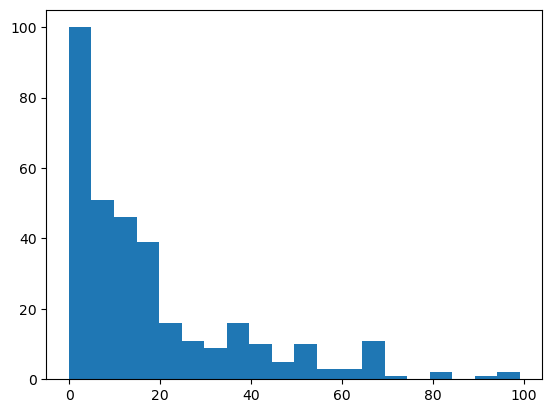

In [19]:
Y_test.hist(bins=20, grid=False)

<Axes: >

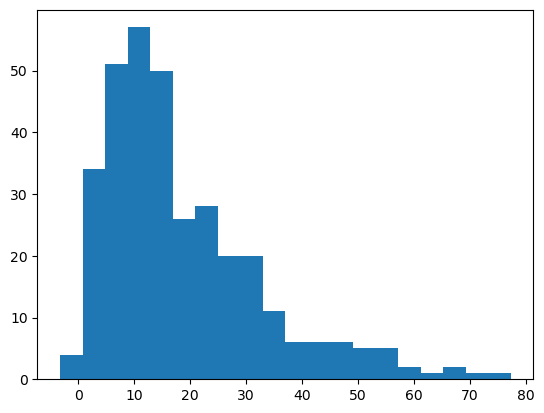

In [20]:
Yk_test.hist(bins=20, grid=False)

In [21]:
Y_test.skew()

1.5666145775105602

In [22]:
Yk_test.skew()

1.3859620641132089

In [23]:
Y_test.kurt()

2.174068421900038

In [24]:
Yk_test.kurt()

1.9626612127279306

## Random baseline

In [25]:
from sklearn.dummy import DummyRegressor
dummy_reg = DummyRegressor(strategy='mean')
dummy_reg = dummy_reg.fit(None, Y_train)
print(f'train {dummy_reg.score(None, Y_train):.4f}, test {dummy_reg.score(None, Y_test):.4f}')

train 0.0000, test -0.0093
